Дані пов'язані з прямими маркетинговими кампаніями (телефонними дзвінками) португальської банківської установи. Задача моделі - передбачити, чи підпишеться клієнт на строковий депозит ( цільова змінна - y).

## Data loading

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import pearsonr, chi2_contingency
import os
# sns.set(rc={'figure.figsize':(10, 8)}); 

In [56]:
print(os.getcwd())
df = pd.read_csv('./bank--additional-full.csv', sep = ';', na_values = 'unknown') 

d:\Machine Learning Course\ML_Fall2024\LW1


## Data understanding

* age - Вік замовника
* job - Робота замовника
* marital - Сімейний стан клієнта
* education - Освітній статус клієнта
* default - Чи має клієнт банківський кредит
* housing - Чи брав клієнт іпотеку
* loan - Чи брав клієнт особистий кредит
* is_telephone_contact - Чи був контакт з клієнтом через стаціонарний телефон
* month - Місяць, коли з клієнтом був останній контакт
* day_of_week - День тижня, коли з клієнтом востаннє зв'язувалися
* duration - Скільки часу пройшло з моменту останнього контакту з клієнтом?
* campaign - Кількість дзвінків одному клієнту в рамках однієї кампанії
* pdays - Кількість днів, що минули з моменту останнього контакту з клієнтом у попередній кампанії
* previous - Кількість дзвінків, здійснених з цим клієнтом до цієї кампанії
* poutcome - Результат попередньої кампанії для цього клієнта
* y - Результат поточної кампанії для цього клієнта

##### Попередній аналіз наявних даних:

In [57]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [59]:
df.describe(include = 'all')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,40858,41108,39457,32591,40198,40198,41188,41188,41188,...,41188.000000,41188.000000,41188.000000,41188,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188
unique,NaN,11,3,7,2,2,2,2,10,5,...,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,2
top,NaN,admin.,married,university.degree,no,yes,no,cellular,may,thu,...,NaN,NaN,NaN,nonexistent,NaN,NaN,NaN,NaN,NaN,no
freq,NaN,10422,24928,12168,32588,21576,33950,26144,13769,8623,...,NaN,NaN,NaN,35563,NaN,NaN,NaN,NaN,NaN,36548
mean,40.02406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.567593,962.475454,0.172963,NaN,0.081886,93.575664,-40.502600,3.621291,5167.035911,NaN
std,10.42125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.770014,186.910907,0.494901,NaN,1.570960,0.578840,4.628198,1.734447,72.251528,NaN
min,17.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,0.000000,0.000000,NaN,-3.400000,92.201000,-50.800000,0.634000,4963.600000,NaN
25%,32.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,999.000000,0.000000,NaN,-1.800000,93.075000,-42.700000,1.344000,5099.100000,NaN
50%,38.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,999.000000,0.000000,NaN,1.100000,93.749000,-41.800000,4.857000,5191.000000,NaN
75%,47.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,999.000000,0.000000,NaN,1.400000,93.994000,-36.400000,4.961000,5228.100000,NaN


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [61]:
df.isnull().sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [62]:
def create_boxplot(x, y, data, title, xlabel, ylabel, palette, ax):
    sns.boxplot(x=x, y=y, hue=x, data=data, palette=palette, ax=ax, legend=False)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
def create_countplot(column, hue, title, ax):
    ax = sns.countplot(x=column, hue=hue, data=df, palette='pink', ax=ax)
    
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{height:.1f}', 
                    (bar.get_x() + bar.get_width() / 2, height),
                    ha='center', va='bottom')
    ax.set_title(title)


##### Описова статистика

In [63]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(f'\nОписова статистика для змінної: {column}')
    print(df[column].value_counts())



Описова статистика для змінної: job
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
Name: count, dtype: int64

Описова статистика для змінної: marital
marital
married     24928
single      11568
divorced     4612
Name: count, dtype: int64

Описова статистика для змінної: education
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
illiterate                18
Name: count, dtype: int64

Описова статистика для змінної: default
default
no     32588
yes        3
Name: count, dtype: int64

Описова статистика для змінної: housing
housing
yes    21576
no     18622
Name: count, dtype: int64

Описова статистика для змінної: loan
loan
no     33950
yes     624

Інфографіка для числових змінних

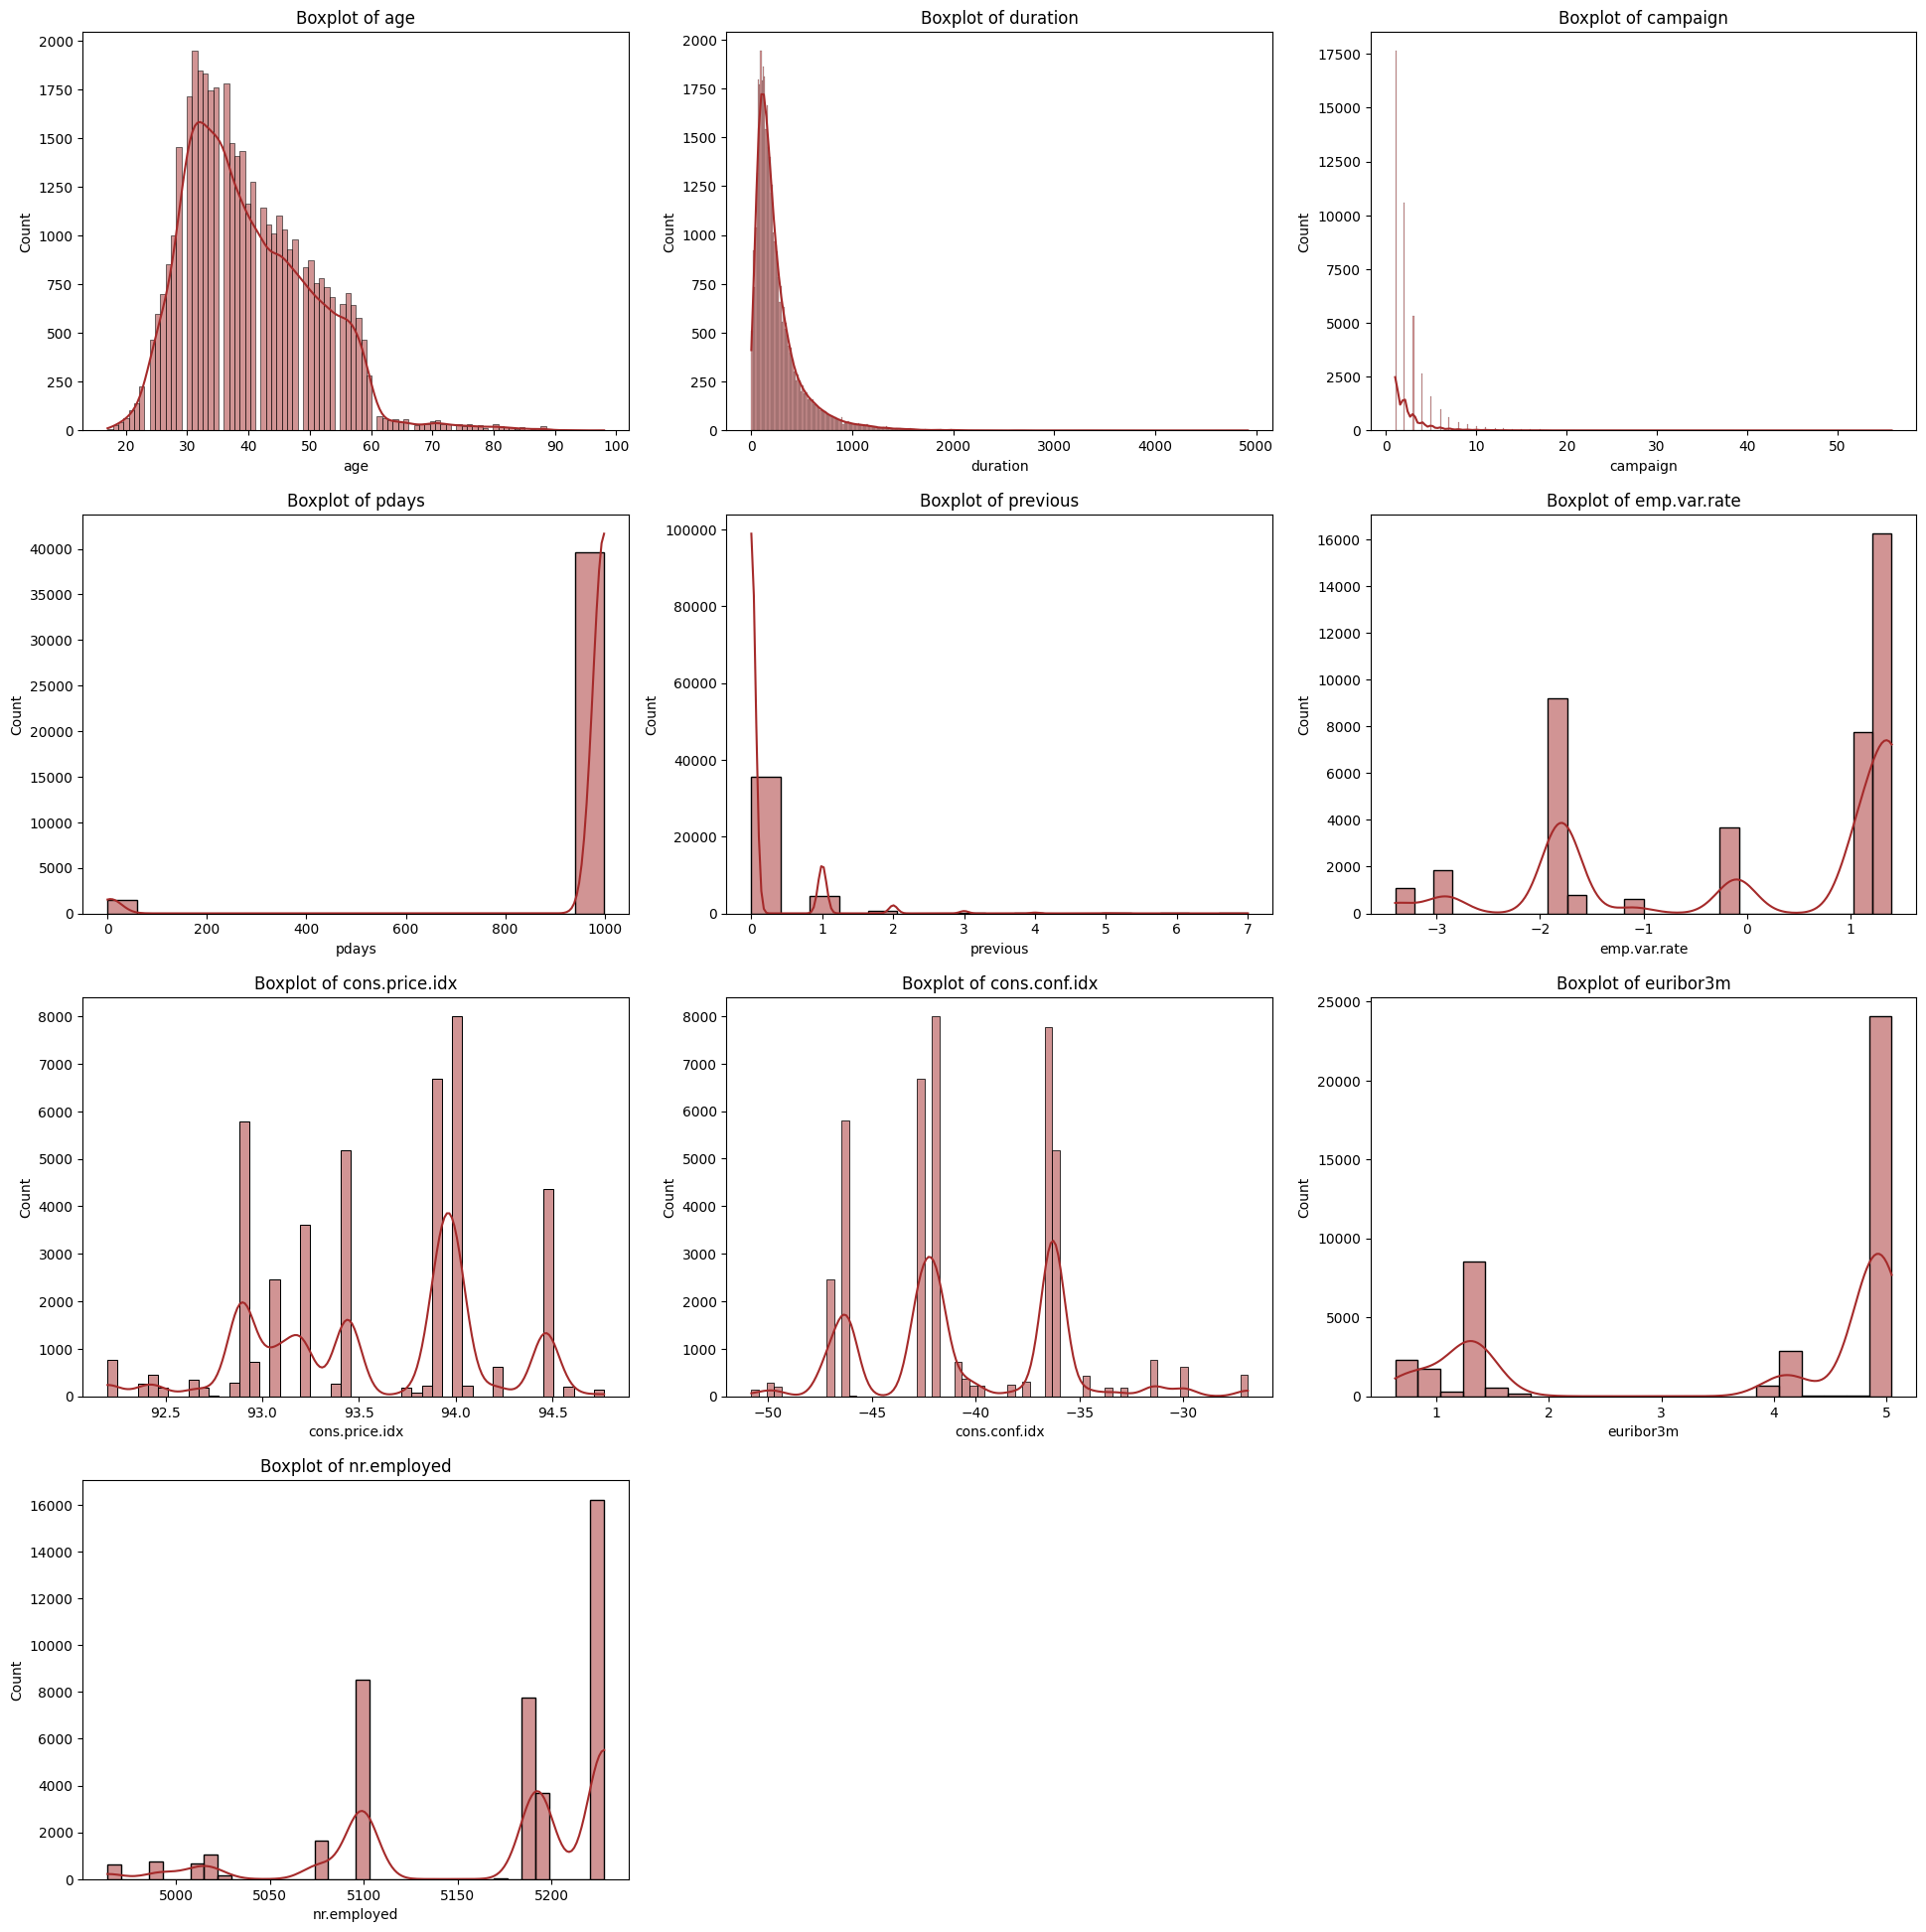

In [64]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

cols = 3
rows = (len(numeric_columns) + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=4.0)

for i, column in enumerate(numeric_columns):
    row = i // cols
    col = i % cols
    sns.histplot(x=df[column], color='brown', ax=axes[row, col], kde = True)
    axes[row, col].set_title(f'Boxplot of {column}')

for j in range(len(numeric_columns), rows * cols):
    fig.delaxes(axes.flat[j])

plt.show()


Інфографіка для категоріальних змінних


C:\Users\Admin\AppData\Local\Temp\ipykernel_15428\4158048845.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=value_counts.index, y=value_counts.values, palette='pink')
C:\Users\Admin\AppData\Local\Temp\ipykernel_15428\4158048845.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=value_counts.index, y=value_counts.values, palette='pink')
C:\Users\Admin\AppData\Local\Temp\ipykernel_15428\4158048845.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[i], x=value_counts.index, y=value_counts.values, palet

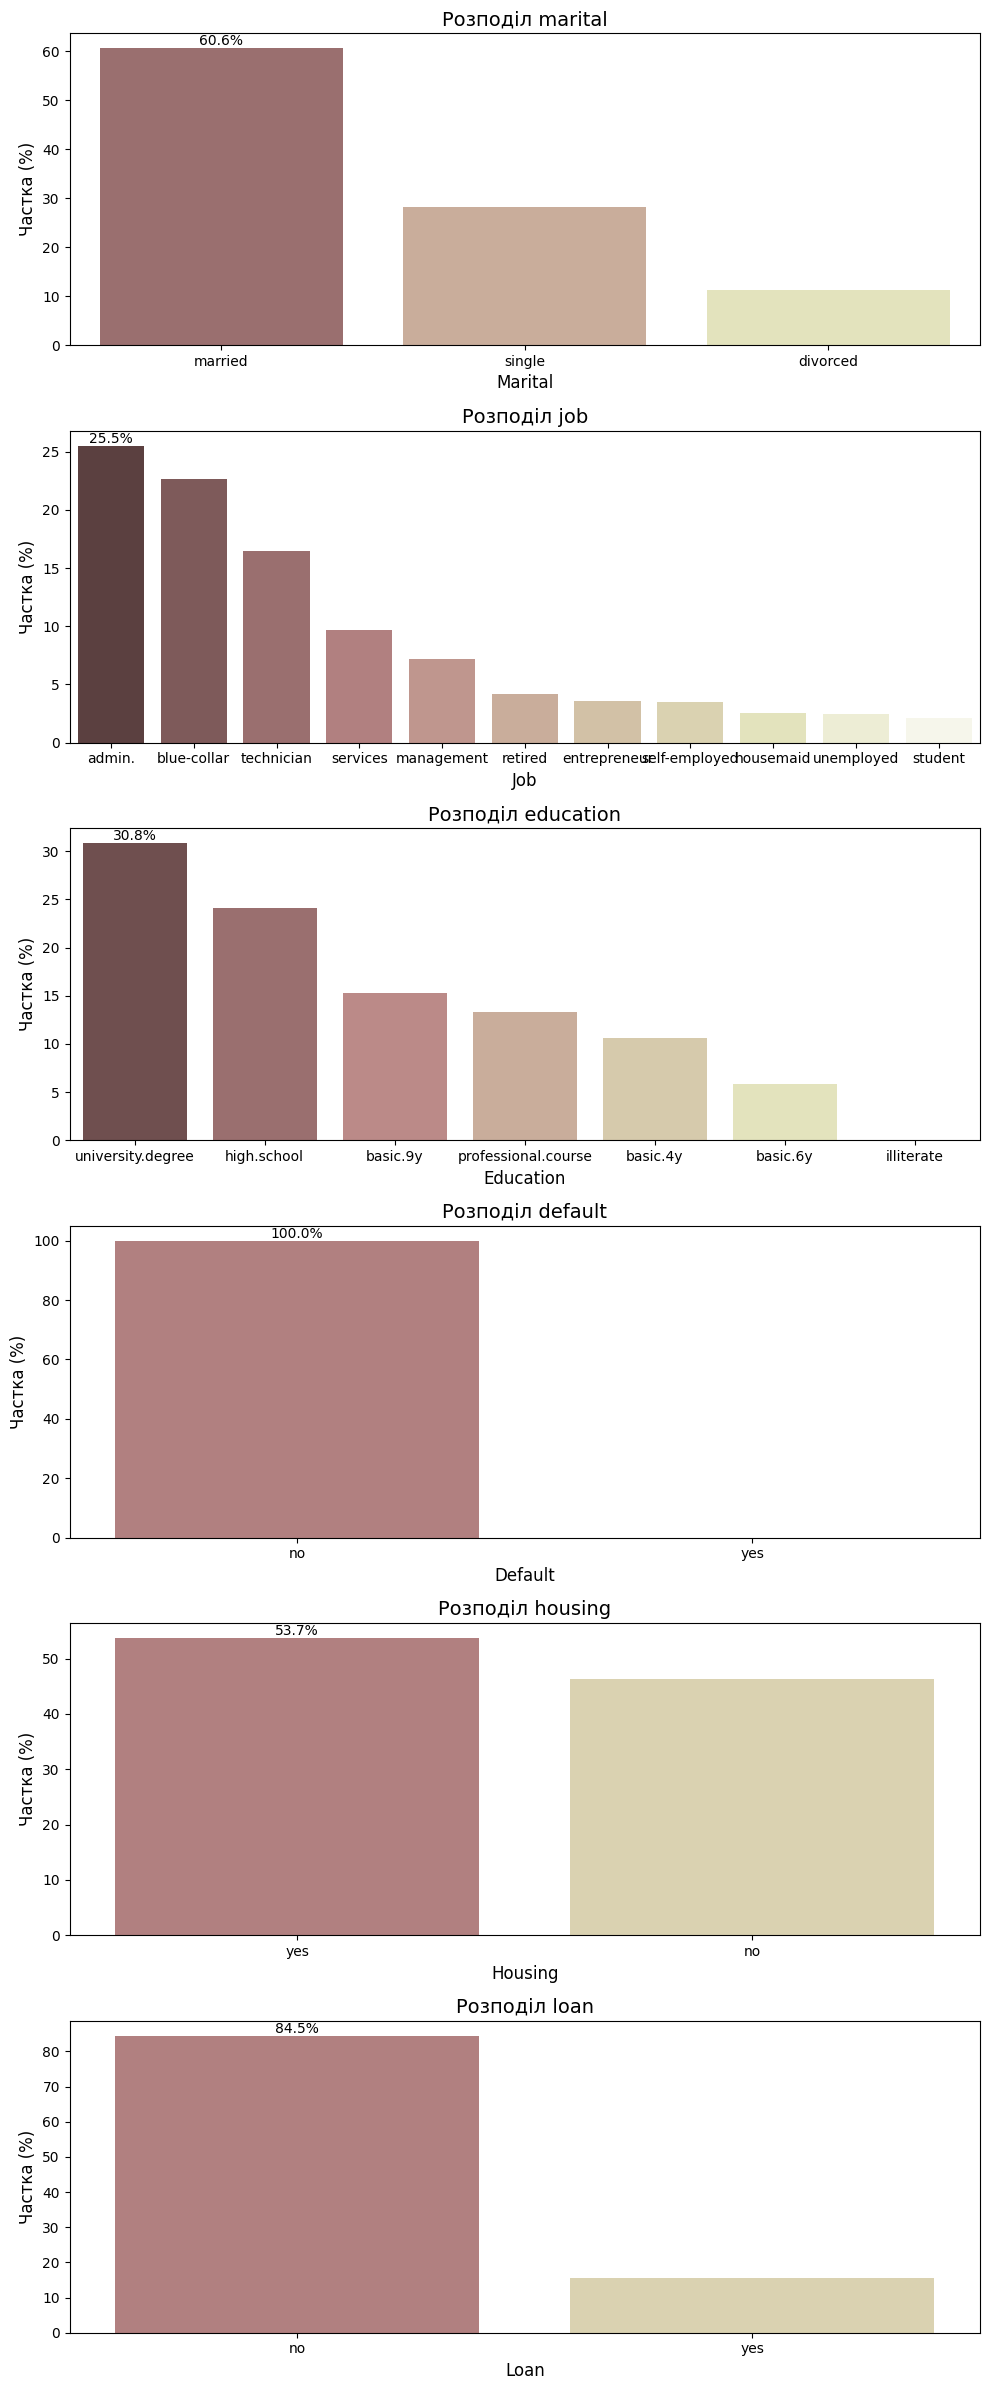

In [65]:
categorical_columns = ['marital', 'job', 'education', 'default', 'housing', 'loan']

fig, axes = plt.subplots(len(categorical_columns), 1, figsize=(10, len(categorical_columns) * 4))

for i, column in enumerate(categorical_columns):
    value_counts = df[column].value_counts(normalize=True) * 100 
    sns.barplot(ax=axes[i], x=value_counts.index, y=value_counts.values, palette='pink')
    
    axes[i].set_title(f"Розподіл {column}", fontsize=14)
    axes[i].set_xlabel(column.capitalize(), fontsize=12)
    axes[i].set_ylabel("Частка (%)", fontsize=12)
    axes[i].bar_label(axes[i].containers[0], fmt="%.1f%%") 

plt.tight_layout()
plt.show()


##### Дослідження на наявність викидів

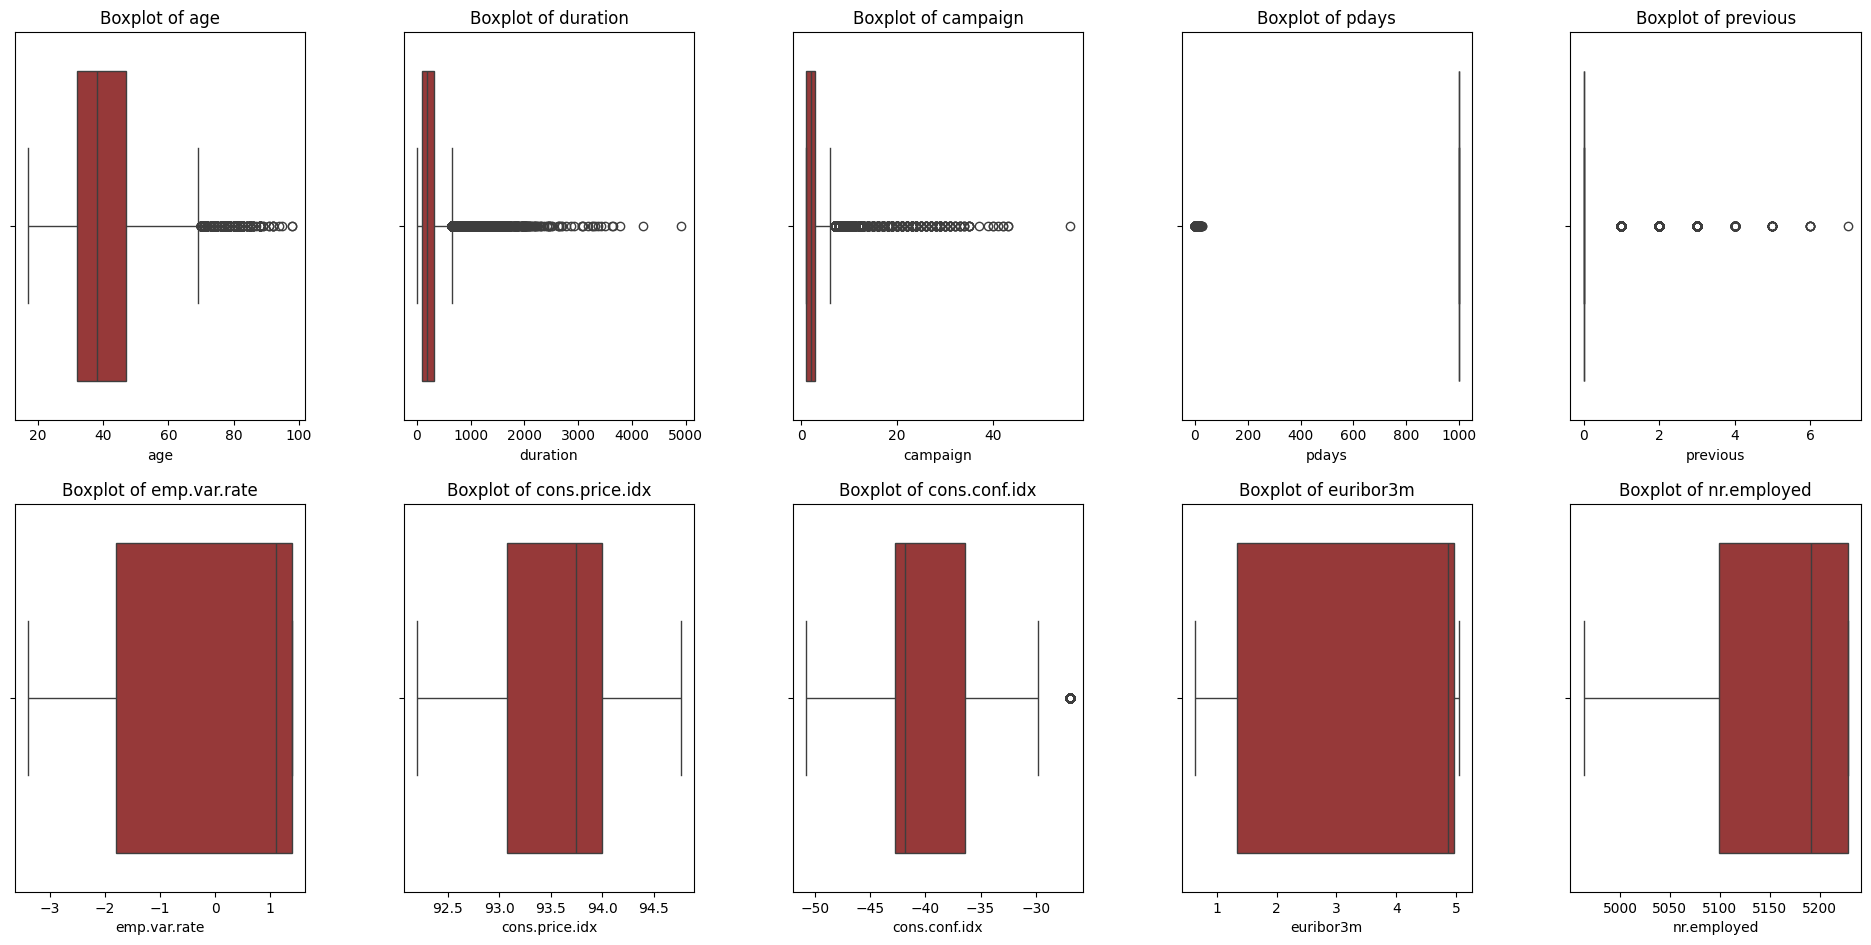

In [66]:
# about wrong data 
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

cols = 5
rows = (len(numeric_columns) + cols - 1) // cols 

fig, axes = plt.subplots(rows, cols, figsize=(20, 10))
fig.tight_layout(pad=4.0)

for i, column in enumerate(numeric_columns):
    row = i // cols
    col = i % cols
    sns.boxplot(x=df[column], color='brown', ax=axes[row, col])
    axes[row, col].set_title(f'Boxplot of {column}')

for j in range(len(numeric_columns), rows * cols):
    fig.delaxes(axes.flat[j])

plt.show()


##### Демографічні дані:

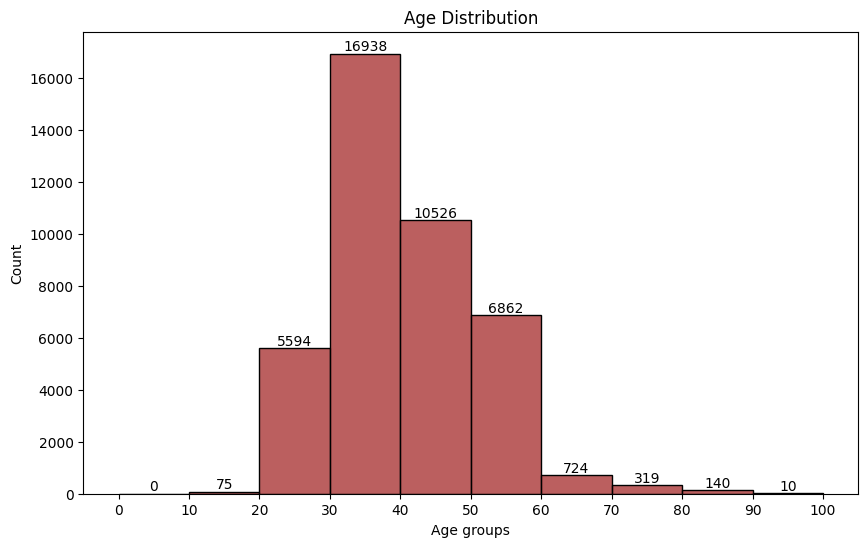

In [67]:
# Age Distribution
bins = np.arange(0, 101, 10)

plt.figure(figsize=(10, 6))
ax = sns.histplot(df['age'], bins=bins, kde=False, edgecolor='black', color = 'brown')


for i in ax.containers:
    ax.bar_label(i, )

plt.xlabel('Age groups')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.xticks(bins)
plt.show()

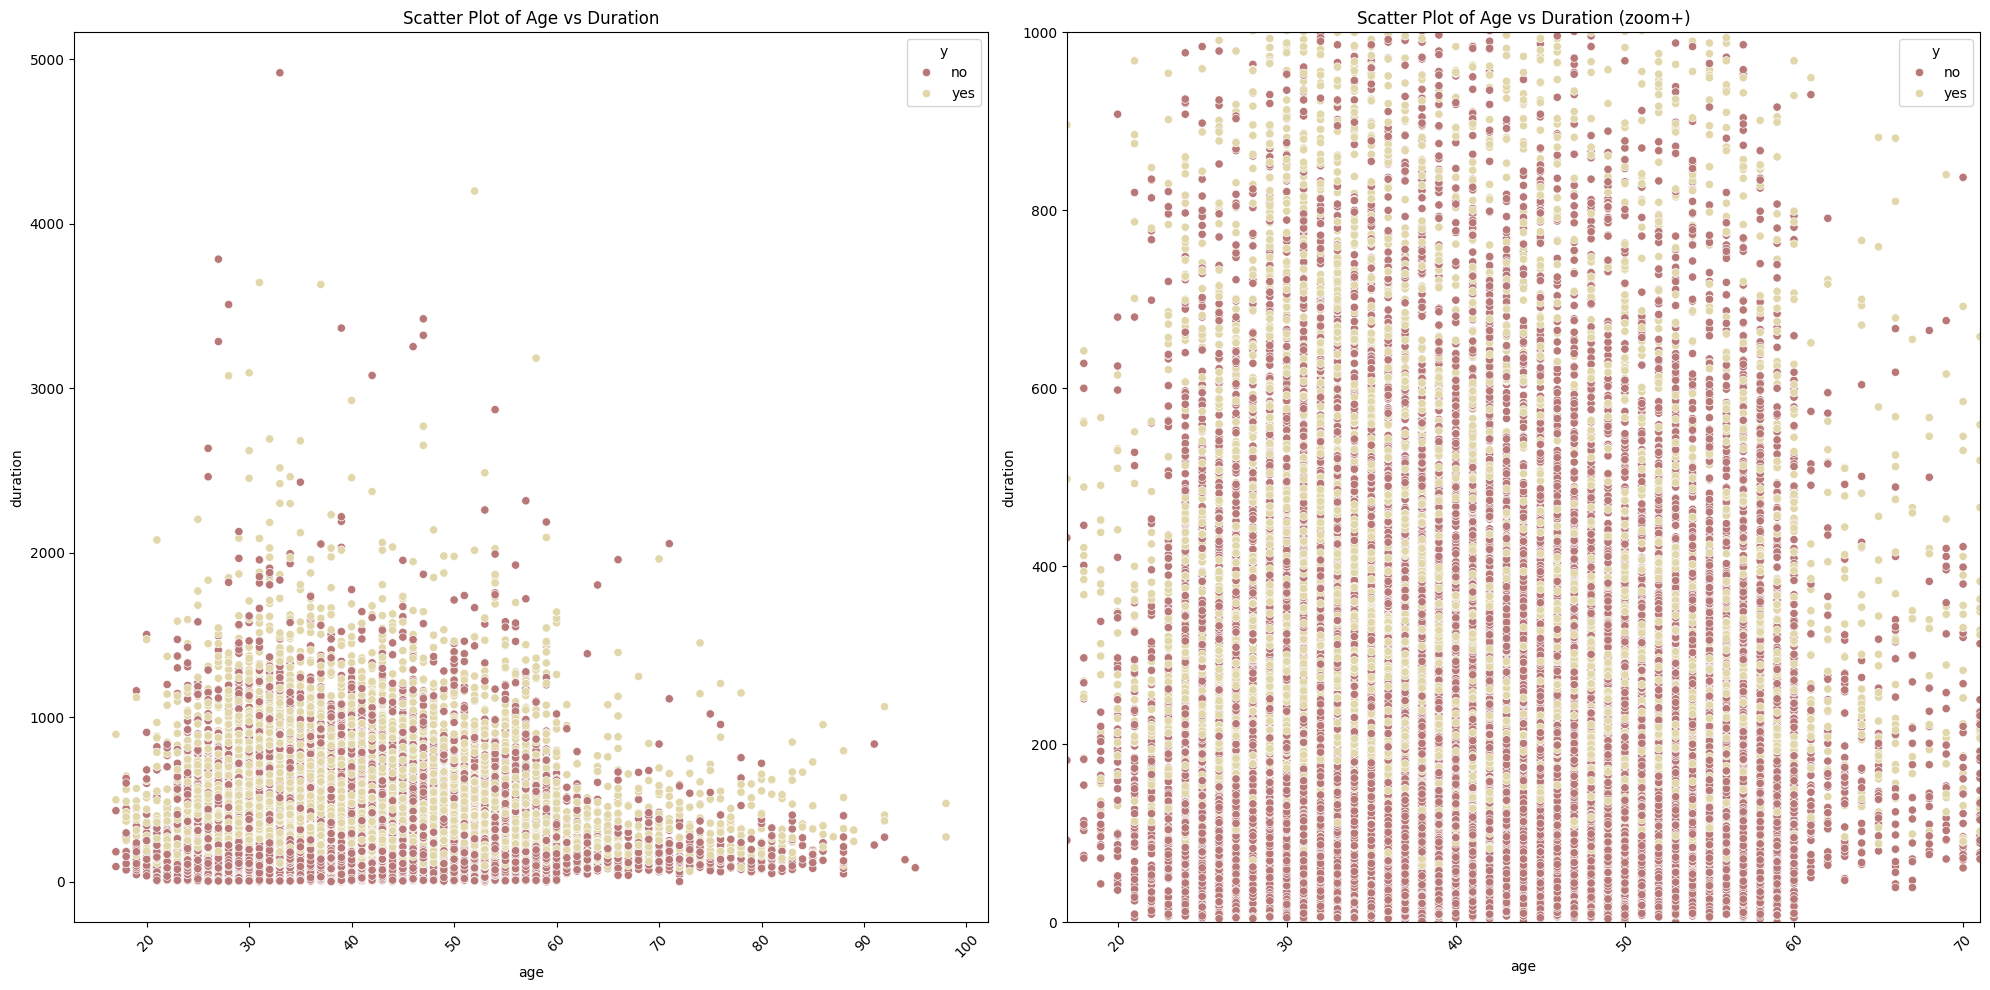

In [68]:
#age - duration

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) 

############################################################################
ax = sns.scatterplot(x='age', y='duration', data=df, hue='y', palette='pink', ax=axes[0])
axes[0].set_title('Scatter Plot of Age vs Duration')
axes[0].tick_params(axis='x', rotation=45)

############################################################################
ax = sns.scatterplot(x='age', y='duration', data=df, hue='y', palette='pink', ax=axes[1])
axes[1].set_title('Scatter Plot of Age vs Duration (zoom+)')
axes[1].tick_params(axis='x', rotation=45)
plt.ylim(0,1000)
plt.xlim(17, 71)
plt.tight_layout()
plt.show()


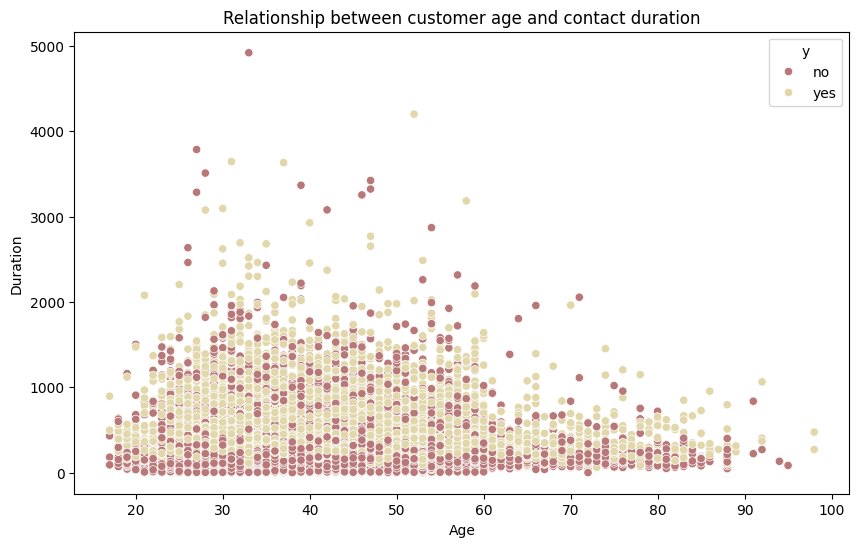

Pearsons correlation coefficient: -0.0009
p-value: 0.8605


In [69]:
#Age - duration [corr]
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='duration', data=df, hue='y', palette='pink')

plt.title('Relationship between customer age and contact duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

correlation, p_value = pearsonr(df['age'], df['duration'])

print(f'Pearsons correlation coefficient: {correlation:.4f}')
print(f'p-value: {p_value:.4f}') #p-значення < 0.05 - статистично значущa.


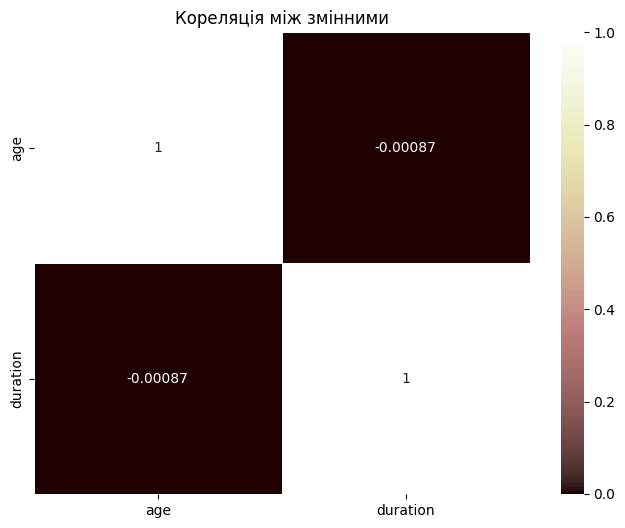

In [70]:
#heatmap corr
matrix = df[['age', 'duration']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(matrix, annot=True, cmap='pink', linewidths=0.5)

plt.title('Кореляція між змінними')
plt.show()

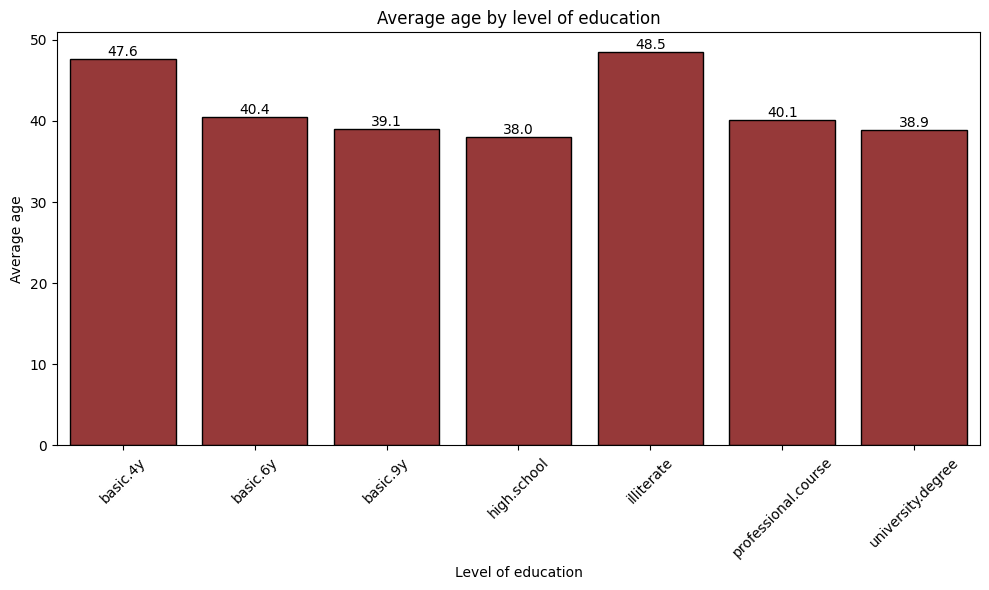

In [71]:
#education - age
education_age_means = df.groupby('education')['age'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='education', y='age', data=education_age_means, color='brown', edgecolor = 'black')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Average age by level of education')
plt.xlabel('Level of education')
plt.ylabel('Average age')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Чи є це співвідношення статистично значущим?


In [72]:
mean_ages = df.groupby('education')['age'].mean().reset_index()
education_levels = mean_ages['education'].astype('category').cat.codes

correlation, p_value = stats.pearsonr(education_levels, mean_ages['age'])
print(f"Кореляція Пірсона: {correlation:.4f}, p-value: {p_value:.4f}")
if p_value < 0.05:
    print("Зв'язок між рівнем освіти та середнім віком є статистично значущим.")
else:
    print("Зв'язок між рівнем освіти та середнім віком НЕ є статистично значущим.")


Кореляція Пірсона: -0.3092, p-value: 0.4998
Зв'язок між рівнем освіти та середнім віком НЕ є статистично значущим.


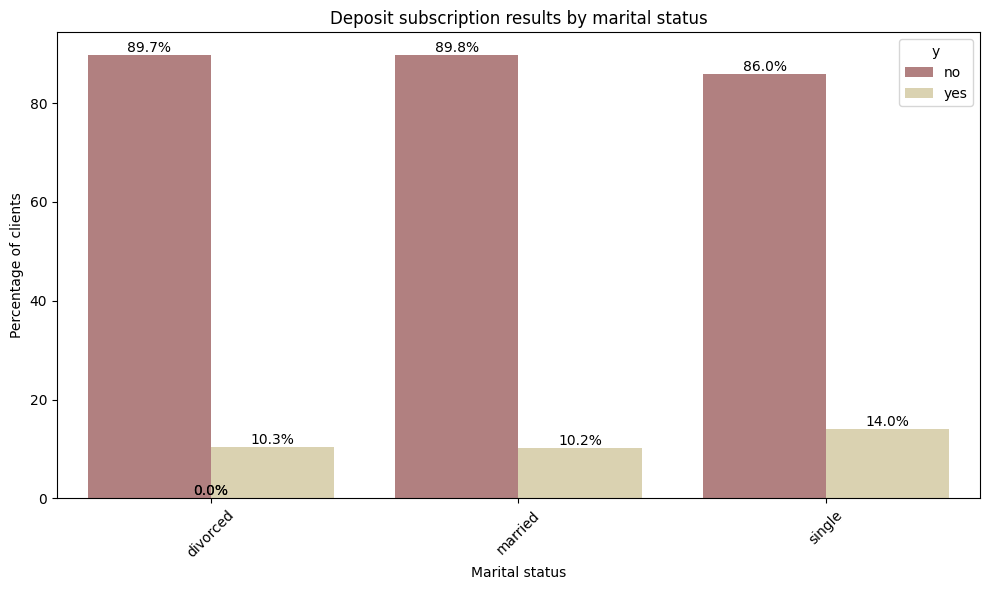

In [73]:
df_percent = df.groupby('marital')['y'].value_counts(normalize=True).unstack() * 100

# Перетворюємо дані в довгий формат для побудови графіка
df_percent = df_percent.reset_index().melt(id_vars='marital', value_name='percentage')

# Побудова графіка з відсотками
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='marital', y='percentage', hue='y', data=df_percent, palette='pink')

# Додаємо анотації з відсотками
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height:.1f}%', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Deposit subscription results by marital status')
plt.xlabel('Marital status')
plt.ylabel('Percentage of clients')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Середній вік неодружених клієнтів:

In [74]:
#Average age of unmarried clients

df[df['marital'] != 'married']['age'].mean()

36.523862238622385

Описова статистика віку неодружених клієнтів:
count    11568.000000
mean        33.158714
std          7.534553
min         17.000000
25%         28.000000
50%         32.000000
75%         37.000000
max         86.000000
Name: age, dtype: float64


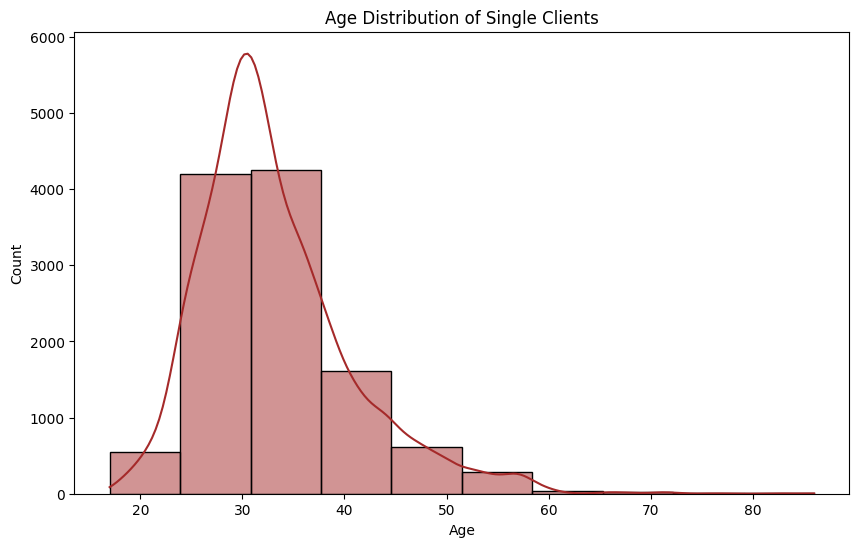

In [75]:
single_clients = df[df['marital'] == 'single']

print("Описова статистика віку неодружених клієнтів:")
print(single_clients['age'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(single_clients['age'], bins=10, kde=True, color='brown', edgecolor='black')
plt.title('Age Distribution of Single Clients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

##### Освітні та робочі дані про клієнта:

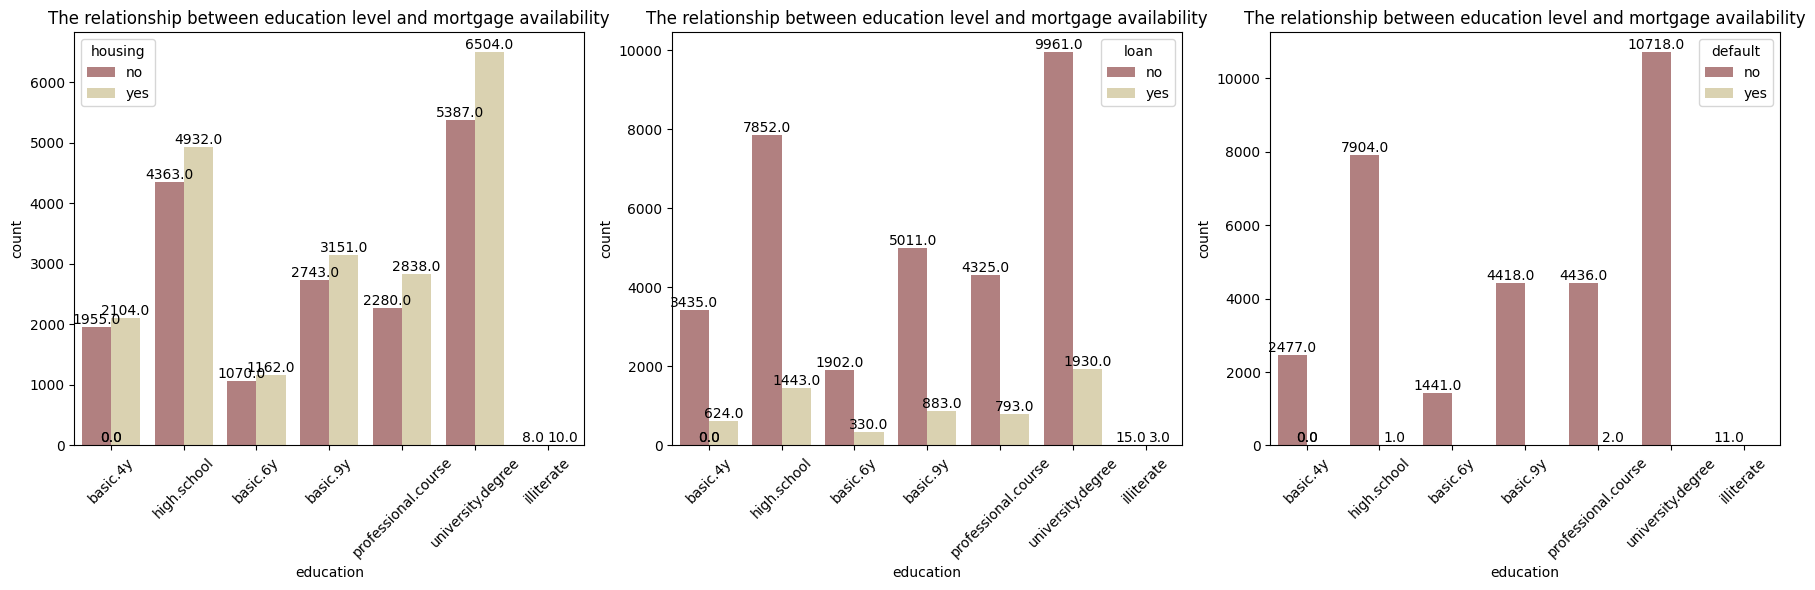

In [76]:
#education - credits
fig, axes = plt.subplots(1, 3, figsize=(18, 6)) 

create_countplot('education', 'housing', "The relationship between education level and mortgage availability", axes[0])
create_countplot('education', 'loan', "The relationship between education level and mortgage availability", axes[1])
create_countplot('education', 'default', "The relationship between education level and mortgage availability", axes[2])

axes[0].tick_params(axis='x', rotation=45)
axes[1].tick_params(axis='x', rotation=45)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [77]:
def chi_squared_test(df, col1, col2):
    contingency_table = pd.crosstab(df[col1], df[col2]) 
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)  
    return chi2, p, dof, expected

cols = ['housing', 'loan', 'default']
results = {}

for col in cols:
    chi2, p, dof, expected = chi_squared_test(df, 'education', col)
    results[col] = {
        'Chi-squared': chi2,
        'P-value': p,
        'Degrees of freedom': dof,
        'Expected frequencies': expected
    }

# Виведення результатів
for col, res in results.items():
    print(f"Зв'язок між 'education' і '{col}':")
    print(f"  Chi-squared: {res['Chi-squared']:.4f}")
    print(f"  P-value: {res['P-value']:.4f}")
    print(f"  Degrees of freedom: {res['Degrees of freedom']}")
    print(f"  Expected frequencies:\n{res['Expected frequencies']}\n")

Зв'язок між 'education' і 'housing':
  Chi-squared: 20.7910
  P-value: 0.0020
  Degrees of freedom: 6
  Expected frequencies:
[[1876.9198847  2182.0801153 ]
 [1032.09785234 1199.90214766]
 [2725.44119251 3168.55880749]
 [4298.09567092 4996.90432908]
 [   8.32336978    9.67663022]
 [2366.61147324 2751.38852676]
 [5498.51055652 6392.48944348]]

Зв'язок між 'education' і 'loan':
  Chi-squared: 6.6912
  P-value: 0.3503
  Degrees of freedom: 6
  Expected frequencies:
[[3.42591111e+03 6.33088893e+02]
 [1.88387130e+03 3.48128704e+02]
 [4.97470314e+03 9.19296855e+02]
 [7.84524359e+03 1.44975641e+03]
 [1.51925105e+01 2.80748955e+00]
 [4.31973714e+03 7.98262861e+02]
 [1.00363412e+04 1.85465879e+03]]

Зв'язок між 'education' і 'default':
  Chi-squared: 7.7612
  P-value: 0.2561
  Degrees of freedom: 6
  Expected frequencies:
[[2.47676340e+03 2.36595772e-01]
 [1.44086236e+03 1.37640092e-01]
 [4.41757801e+03 4.21994396e-01]
 [7.90424494e+03 7.55062404e-01]
 [1.09989493e+01 1.05068772e-03]
 [4.437576

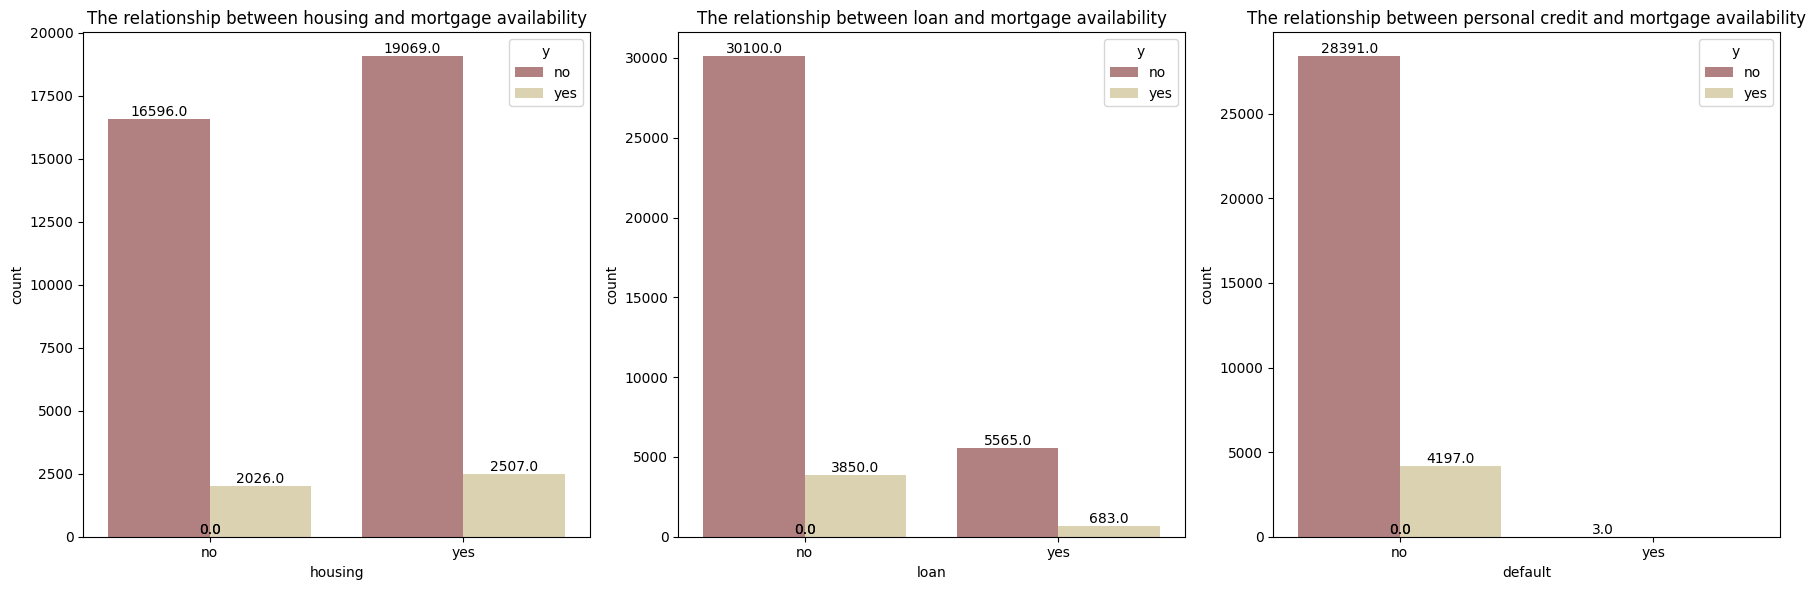

In [78]:
# housing|loan|Default (y\n) => mortage availability
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

create_countplot('housing', 'y', "The relationship between housing and mortgage availability", axes[0])
create_countplot('loan', 'y', "The relationship between loan and mortgage availability", axes[1])
create_countplot('default', 'y', "The relationship between personal credit and mortgage availability", axes[2])

plt.tight_layout()
plt.show()


Чи є зв'язок між наявністю кредиту у клієнта та результатом? 

In [79]:
contingency_table = pd.crosstab(df['default'], df['y'])
# χ²-тест
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)
if p < 0.05:
    print("Є статистично значуща залежність між 'default' і 'y'.")
else:
    print("Немає статистично значущої залежності між 'default' і 'y'.")

Chi-squared: 0.0
P-value: 1.0
Degrees of freedom: 1
Expected frequencies:
 [[2.83913863e+04 4.19661367e+03]
 [2.61366635e+00 3.86333650e-01]]
Немає статистично значущої залежності між 'default' і 'y'.


Інфографіка

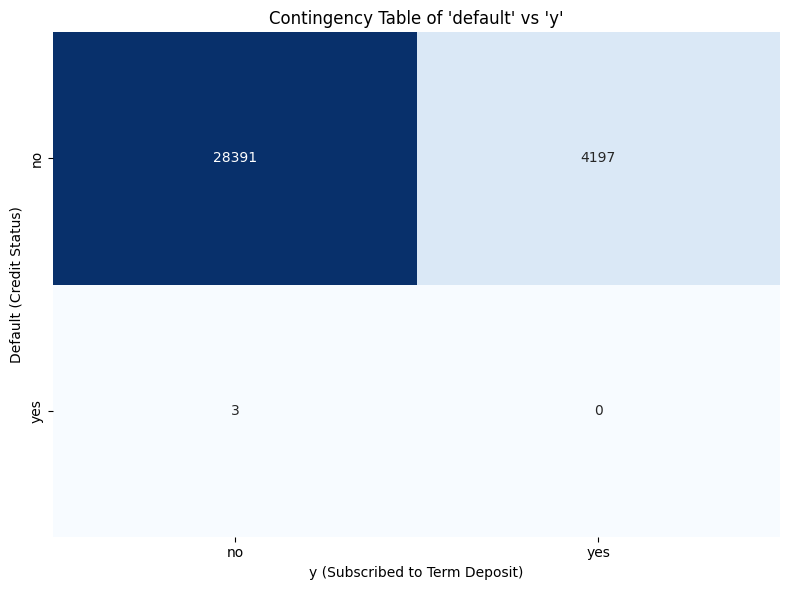

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Contingency Table of 'default' vs 'y'")
plt.xlabel("y (Subscribed to Term Deposit)")
plt.ylabel("Default (Credit Status)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Distribution of jobs')

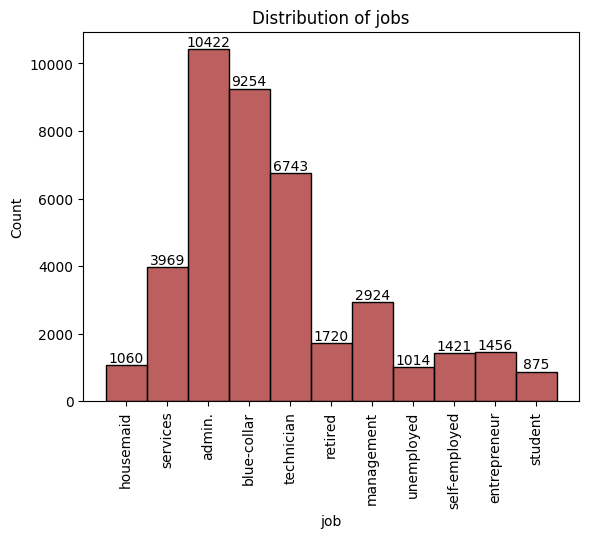

In [81]:
# Distribution of jobs
ax = sns.histplot(data = df['job'], edgecolor = 'black', color = 'brown')
for i in ax.containers:
    ax.bar_label(i, )

plt.xticks(rotation=90)
plt.title('Distribution of jobs')

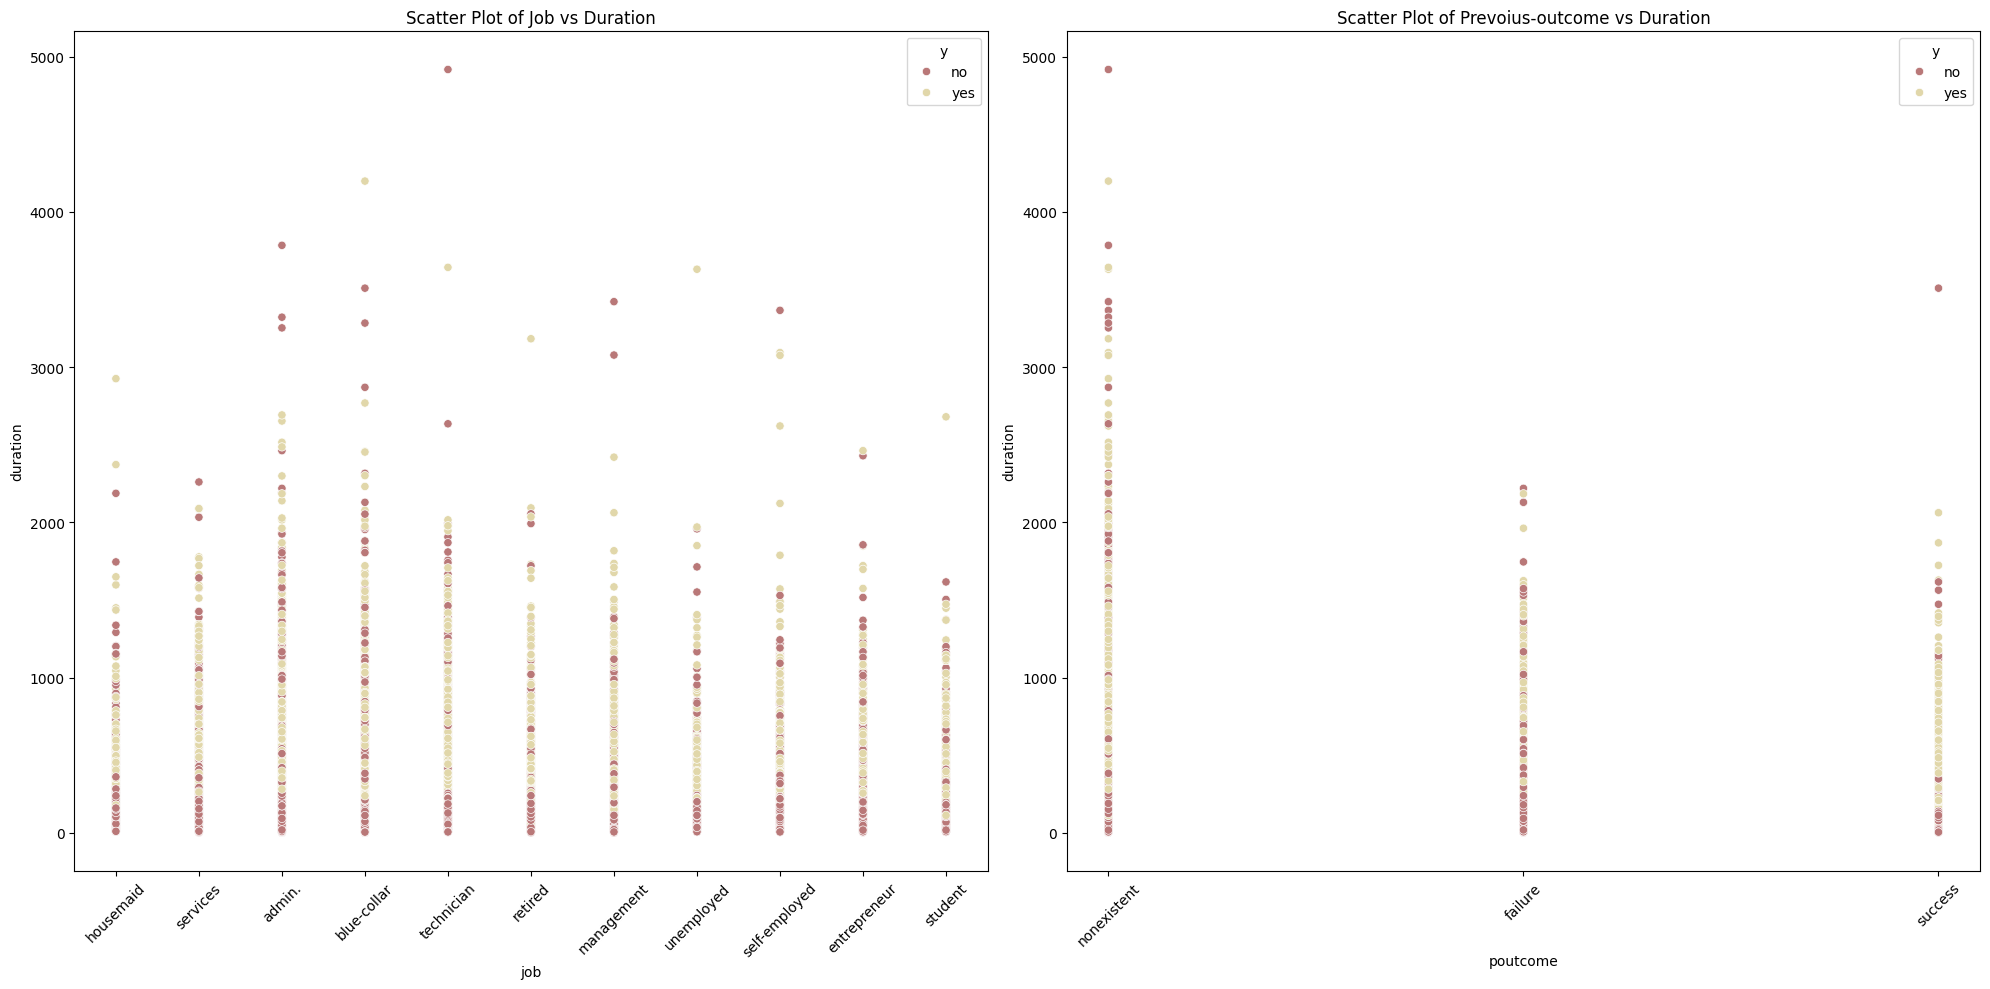

In [82]:
# job - duration

fig, axes = plt.subplots(1, 2, figsize=(20, 10)) 


#######################
ax = sns.scatterplot(x='job', y='duration', data=df, hue='y', palette='pink', ax=axes[0])
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_title('Scatter Plot of Job vs Duration')

#######################
ax = sns.scatterplot(x='poutcome', y='duration', data=df, hue='y', palette='pink', ax=axes[1])
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_title('Scatter Plot of Prevoius-outcome vs Duration')


plt.tight_layout()
plt.show()

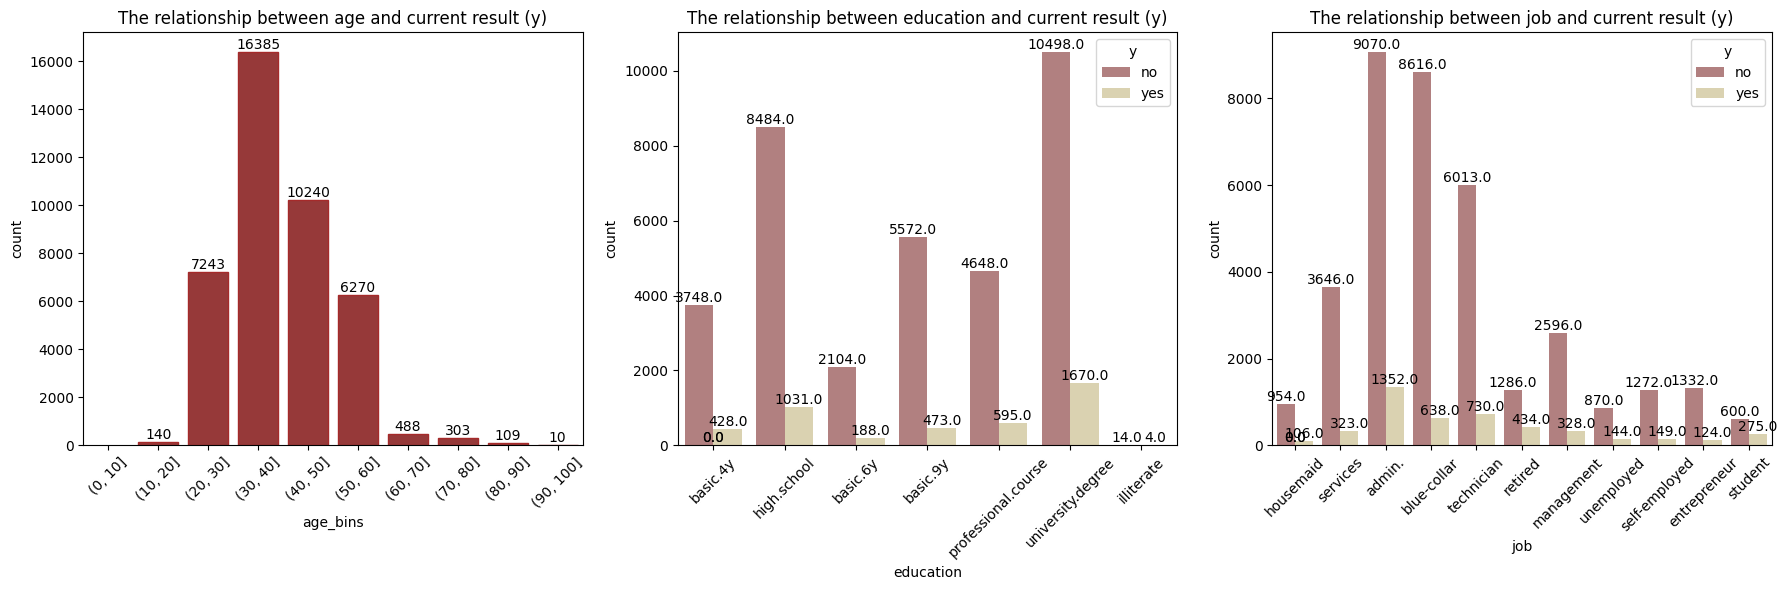

In [83]:
# #age-ed-job => current result (y)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


df['age_bins'] = pd.cut(df['age'], bins=np.arange(0, 101, 10))
ax = sns.countplot(x='age_bins', data=df, edgecolor='brown', color='brown', ax=axes[0])

for i in ax.containers:
    ax.bar_label(i, )

axes[0].set_title('The relationship between age and current result (y)')
axes[0].tick_params(axis='x', rotation=45)

create_countplot('education', 'y', "The relationship between education and current result (y)", axes[1])
axes[1].tick_params(axis='x', rotation=45)
create_countplot('job', 'y', "The relationship between job and current result (y)", axes[2])
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

##### Професійні банківські дані:

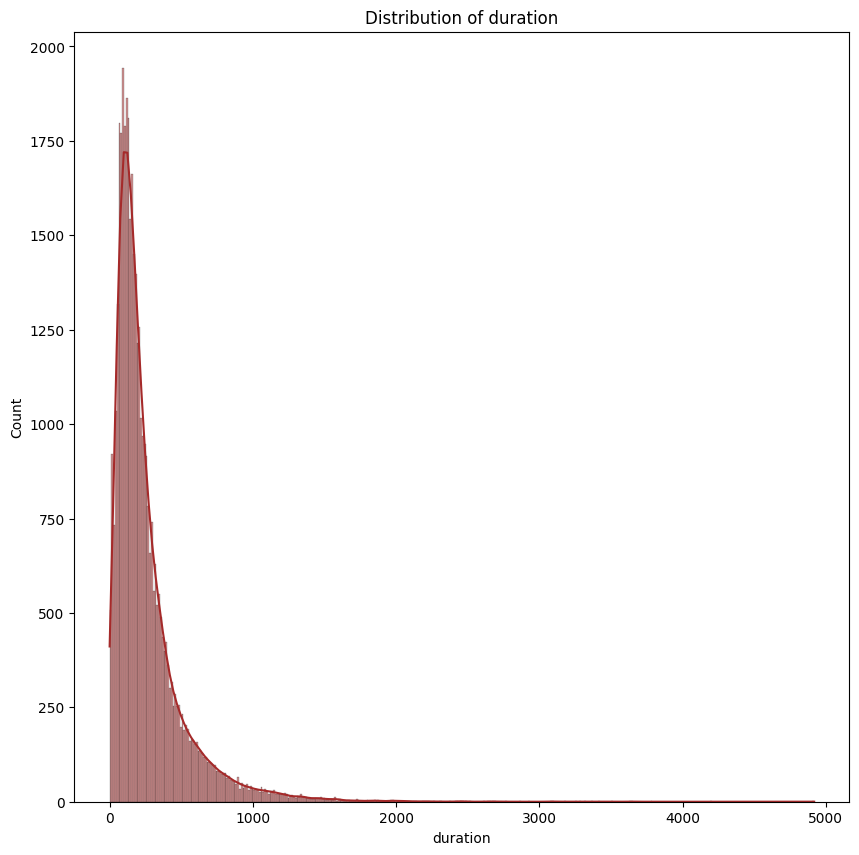

In [84]:
# Distribution of duration
plt.figure(figsize = (10, 10))
sns.histplot(data=df['duration'], edgecolor = 'black', color='brown', kde = True)

plt.title('Distribution of duration')
plt.show()

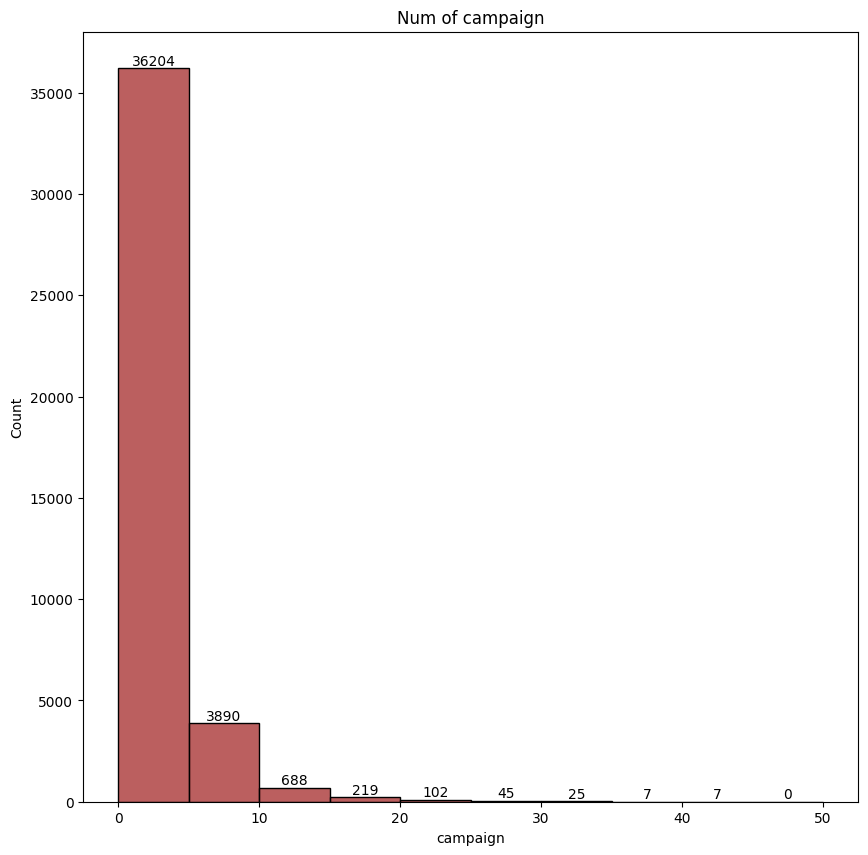

In [85]:
#Campaign

bins = np.arange(0, 51, 5)

plt.figure(figsize=(10, 10))
ax = sns.histplot(df['campaign'], bins=bins, kde=False, edgecolor='black', color = 'brown')
for i in ax.containers:
    ax.bar_label(i, )

plt.title('Num of campaign')
plt.show()

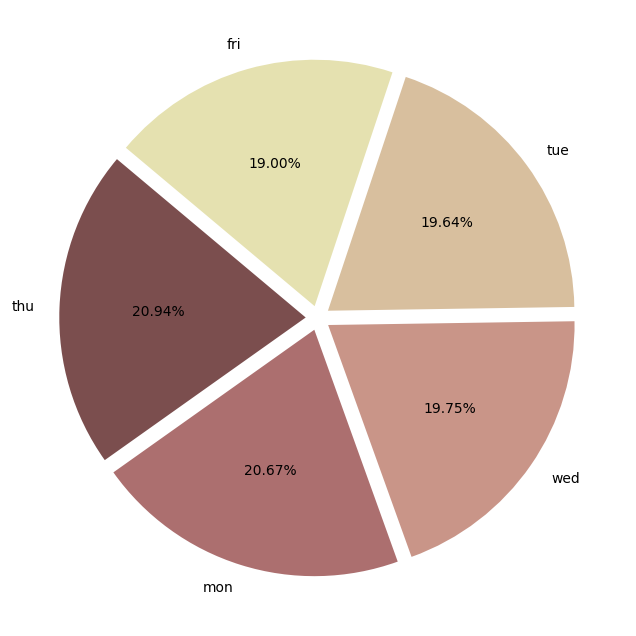

In [86]:
# day of week
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['day_of_week'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
   
plt.show() 

In [87]:
#Most of the failures on: day
clients_no_deposit = df[df['y'] == 'no']
day_of_week_counts = clients_no_deposit['day_of_week'].value_counts()

most_frequent_day = day_of_week_counts.idxmax()
print(f"Most of the failures on: {most_frequent_day}")


Most of the failures on: mon


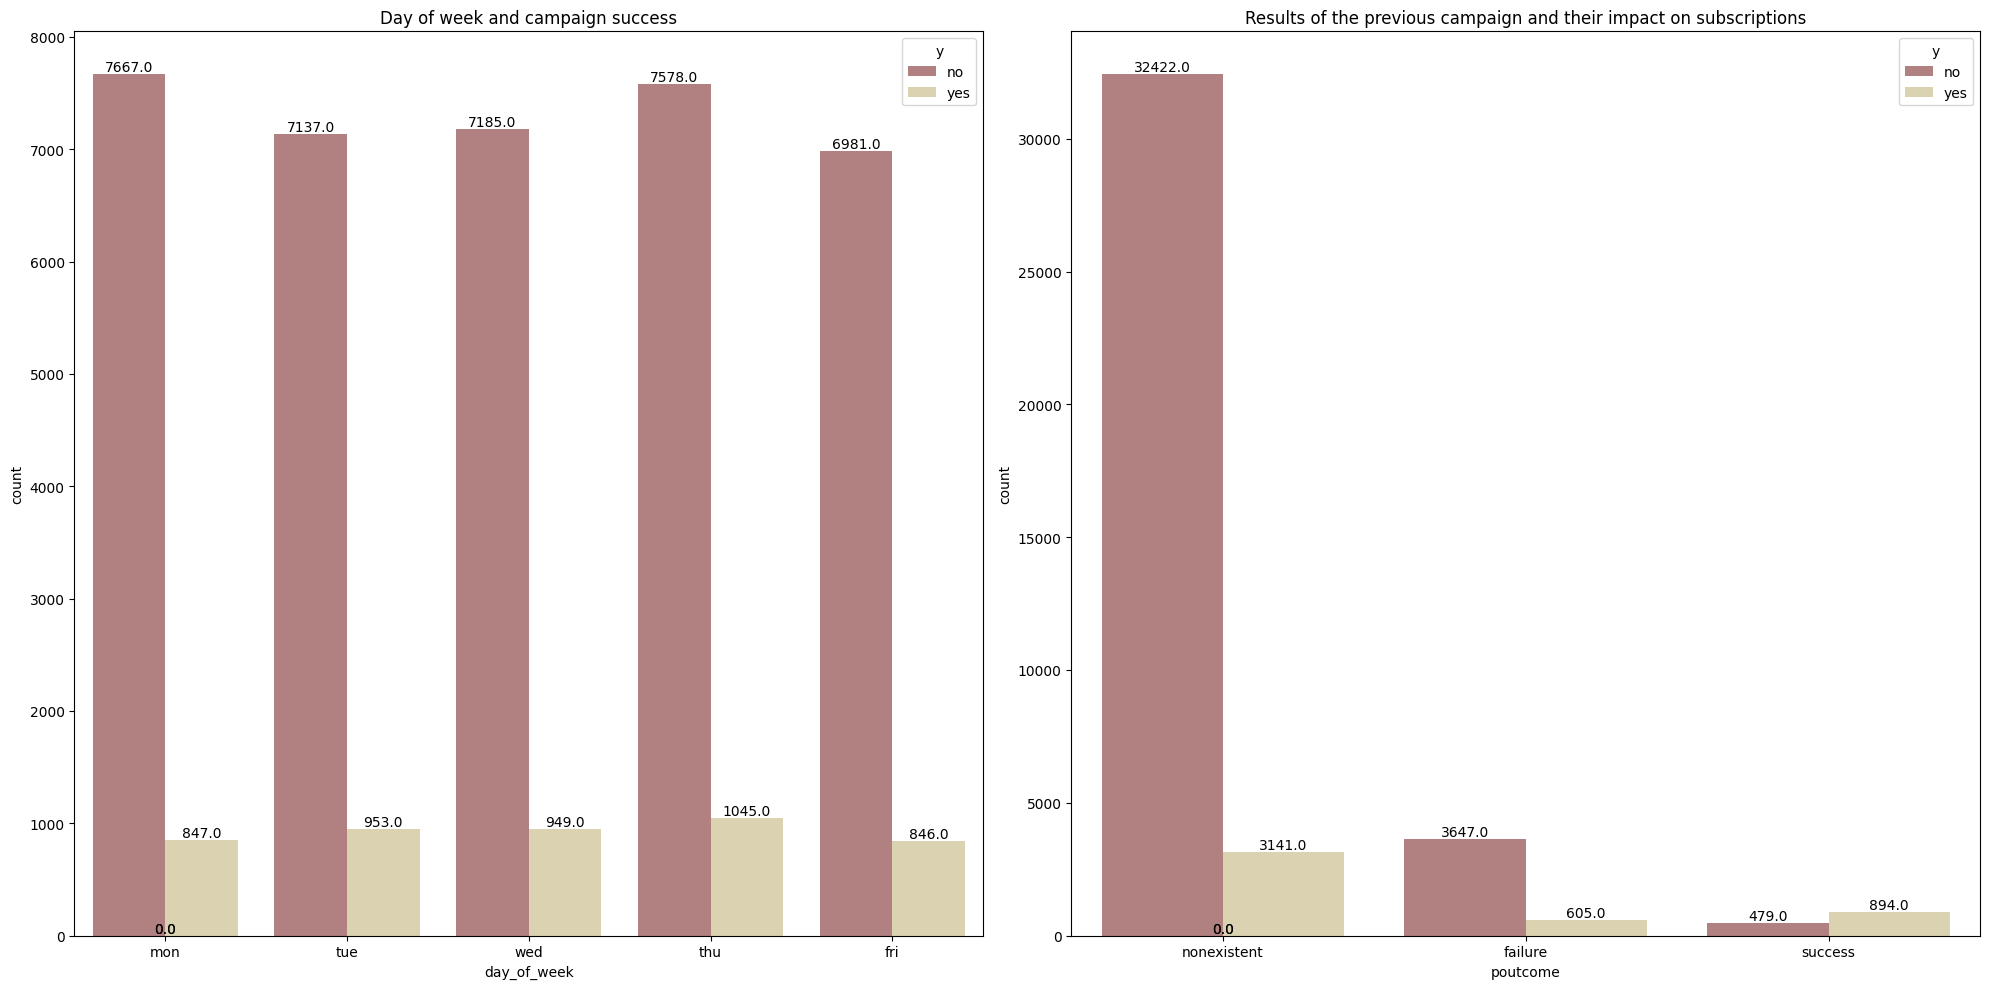

In [88]:
#day|poutcome => y
fig, axes = plt.subplots(1, 2, figsize=(20, 10))

create_countplot('day_of_week', 'y', "Day of week and campaign success", axes[0])
create_countplot('poutcome', 'y', "Results of the previous campaign and their impact on subscriptions", axes[1])

plt.tight_layout()
plt.show()

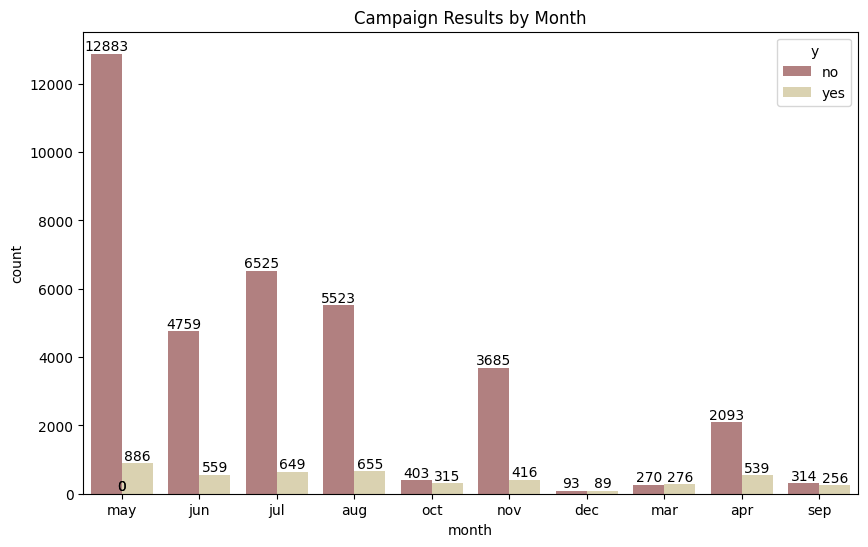

In [89]:
#The result of the current campaign - month
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='month', hue='y', data=df, palette='pink')

for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{int(height)}', 
                (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom')

plt.title('Campaign Results by Month')
plt.show()


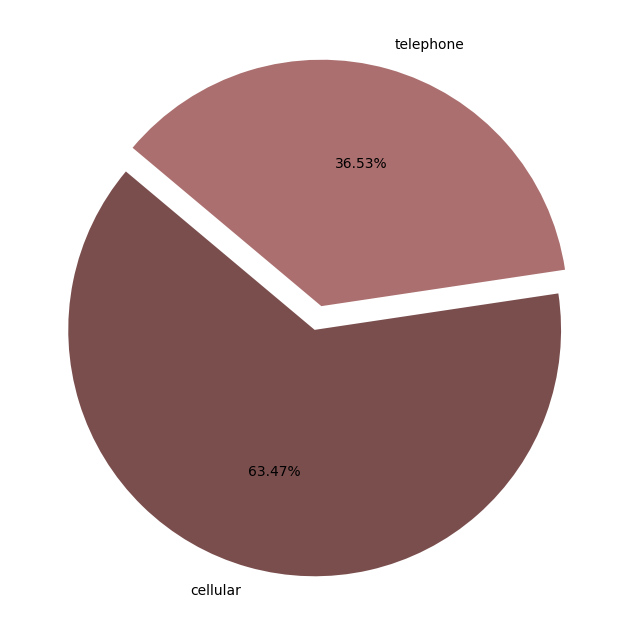

In [90]:
# contact
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['contact'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

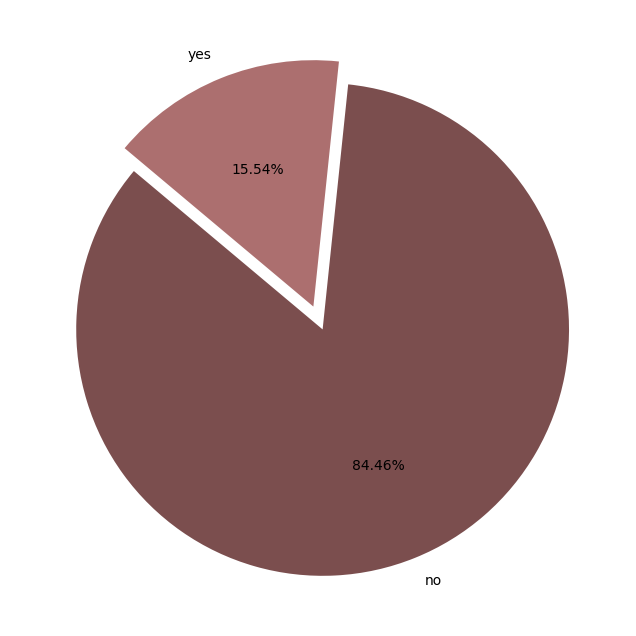

In [91]:
# loan y/n
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['loan'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

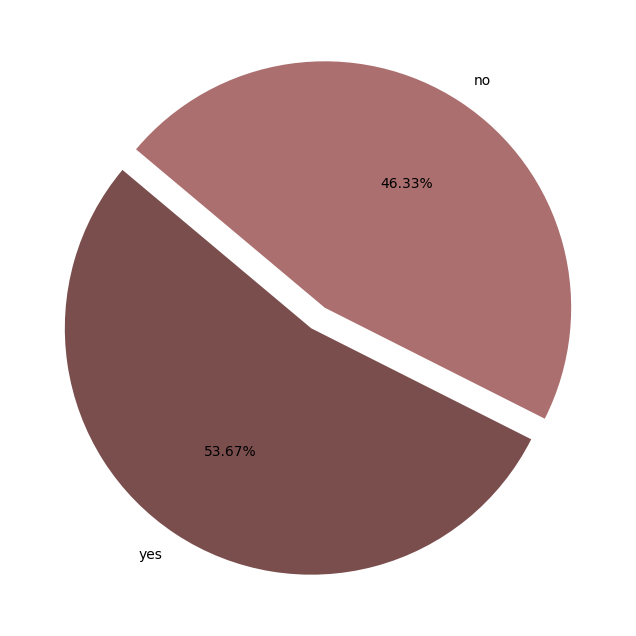

In [92]:
#housing y/n
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['housing'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

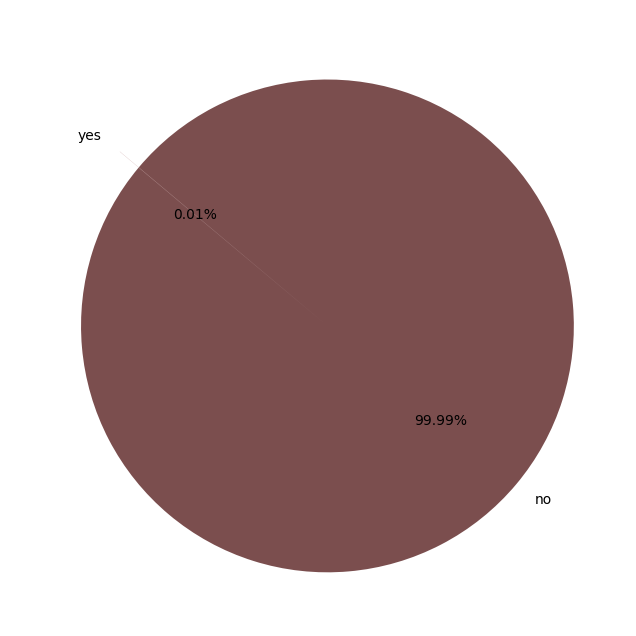

In [93]:
#default y/n
plt.figure(figsize=(8, 8))

palette_color = sns.color_palette('pink') 

value_counts = df['default'].value_counts()
values = list(value_counts.values)
labels = value_counts.index
  
plt.pie(values, labels=labels, autopct='%.2f%%', colors=palette_color, startangle=140, explode=[0.05]*len(labels))
plt.show() 

##### Знаходження значень, які мають найбільший вплив на цільову змінну:

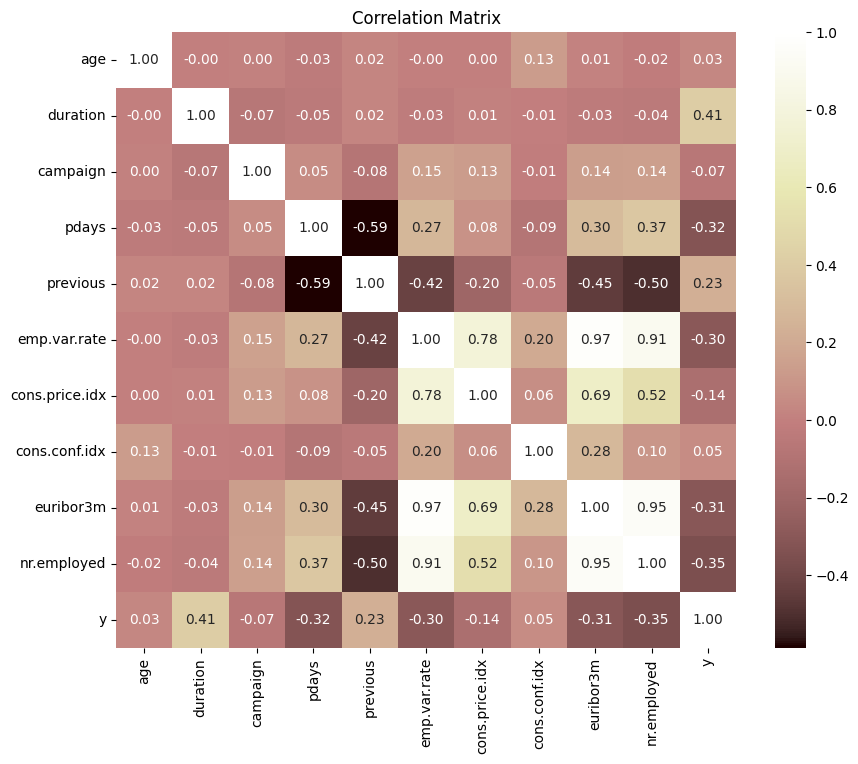

In [94]:
df['y'] = df['y'].map({'yes': 1, 'no': 0})

numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='pink', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()